In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/Datasets/stream_tweets/bot12572_inpoi.csv")
df2 = pd.read_csv("D:/Datasets/stream_tweets/bot12573.csv")
dftot = pd.read_csv("D:/Datasets/stream_tweets/df_finale_sardine.csv")

C:\Users\loren\Anaconda3\envs\deepml-gpu\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (20,23,24,25,28,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_bot = pd.concat([df2,df])

In [4]:
dftot = dftot[["screen_name","text"]]

In [5]:
df_bot["0"] = df_bot["0"].str.lower()

In [6]:
dftot["screen_name"] = dftot["screen_name"].str.lower()

In [7]:
df_bot = df_bot.merge(dftot, left_on = "0", right_on = "screen_name")

In [8]:
df_bot = df_bot[(df_bot["user"] > 4.5)]

In [9]:
df_bot.drop(["0"], inplace = True, axis = 1)

In [11]:
df_bot

,Unnamed: 0,content,english,friend,network,sentiment,temporal,universal,user,screen_name,text
740,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,"A Ravenna per un concerto, Patti Smith ha mani..."
741,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,Le #sardine anche oggi riempono le piazze! \n#...
742,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,"Il movimento delle #sardine ""è contro un lingu..."
743,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,E anche #AnconaNonSiLega! \n\nMigliaia di #Sar...
744,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,A #Pescara le #sardine hanno intonato all'unis...
...,...,...,...,...,...,...,...,...,...,...,...
44952,1946,3.5,3.2,2.4,2.8,4.4,4.5,3.6,4.6,casellafilippo,Le sardine hanno ottenuto un risultato politic...
45097,2064,3.0,3.7,2.0,3.7,4.1,4.4,3.8,4.6,marteina,Che spettacolo https://t.co/jItzrfqmrs
45155,2113,3.8,0.9,0.7,1.1,3.1,0.6,1.0,4.6,alfredopandolf5,Sardine a Roma%3A tutta piazza San Giovanni ca...
45156,2114,2.2,3.6,3.2,4.1,1.5,3.6,4.6,4.7,ghignate,https://t.co/PUZDBxNS8D #RomaNonsiLega #veris...


In [12]:
prova = df_bot.drop_duplicates("screen_name").sort_values(by = "user", ascending= False).head(10)

In [13]:
prova = prova.drop(["Unnamed: 0", "content", "english","sentiment","text"], axis = 1)

In [42]:
!pip install tabulate

  Created wheel for tabulate: filename=tabulate-0.8.6-cp37-none-any.whl size=23279 sha256=4a71ecb1ccb6ed681f260f51558808acfc510fa244ded55ca531b849ecc6d692
  Stored in directory: C:\Users\loren\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


In [ ]:
"plain"
"simple"
"github"
"grid"
"fancy_grid"
"pipe"
"orgtbl"
"jira"
"presto"
"psql"
"rst"
"mediawiki"
"moinmoin"
"youtrack"
"html"
"latex"
"latex_raw"
"latex_booktabs"
"textile"

In [58]:
from tabulate import tabulate
print(tabulate(prova, headers='keys', tablefmt='github', numalign = "center"))

|       |  friend  |  network  |  temporal  |  universal  |  user  | screen_name     |
|-------|----------|-----------|------------|-------------|--------|-----------------|
| 33483 |   1.7    |    3.5    |    4.4     |      3      |  4.9   | petro_france    |
| 28653 |   1.4    |    1.2    |    1.6     |     1.8     |  4.9   | galuppimarco    |
| 30201 |   3.2    |    4.3    |    4.3     |     4.7     |  4.9   | enricosaccani   |
| 40443 |   2.3    |    1.6    |    4.3     |      3      |  4.9   | gabriel58810361 |
| 37006 |    1     |    1.4    |    3.2     |     4.7     |  4.9   | eurofourthreich |
| 29630 |   3.6    |    3.9    |    4.7     |     4.5     |  4.9   | nicolet50018081 |
| 29365 |   2.5    |    2.4    |    2.3     |     4.1     |  4.9   | toninog2        |
| 38116 |   1.6    |    0.6    |    4.8     |     0.7     |  4.9   | toniebasta      |
| 21305 |   0.8    |    3.3    |    2.3     |     2.1     |  4.9   | tropicalputy    |
| 38637 |   3.4    |     1     |    3.4    

In [43]:
sent_nrc_mentions = pd.read_csv("C:/Users/loren/Downloads/risultati_sentiment_mention.csv")

In [46]:
sent_nrc_mentions.rename(columns = {"positive": "positivo","negative":"negativo","anger":"rabbia","anticipation":"attesa",
                                   "disgust": "disgusto","fear": "paura", "joy":"gioia","sadness":"tristezza", "surprise": "sorpresa",
                                   "trust":"fiducia"}, inplace = True)

In [63]:
sent_nrc_mentions = sent_nrc_mentions.round(2)

In [64]:
from tabulate import tabulate
print(tabulate(sent_nrc_mentions, headers='keys', tablefmt='github',numalign="center"))

|    |  cluster  |  positivo  |  negativo  |  rabbia  |  attesa  |  disgusto  |  paura  |  gioia  |  tristezza  |  sorpresa  |  fiducia  |
|----|-----------|------------|------------|----------|----------|------------|---------|---------|-------------|------------|-----------|
| 0  |     0     |    1.67    |    1.59    |   0.73   |   0.63   |    0.44    |  0.67   |  0.51   |    0.63     |    0.36    |   0.87    |
| 1  |     1     |    1.5     |    1.22    |   0.59   |   0.48   |    0.37    |  0.53   |  0.52   |    0.44     |    0.34    |   0.92    |
| 2  |     2     |    1.38    |    1.28    |   0.57   |   0.51   |    0.34    |  0.51   |  0.41   |    0.48     |    0.27    |   0.77    |
| 3  |     3     |    1.79    |    1.34    |   0.61   |   0.6    |    0.36    |  0.56   |  0.58   |     0.6     |    0.34    |   1.08    |
| 4  |     6     |    1.33    |    0.92    |   0.42   |   0.43   |    0.24    |  0.44   |  0.36   |    0.36     |    0.35    |   0.58    |
| 5  |     9     |    1.71 

# text pre-processing

In [53]:
import re
def remove_link(x):
    x = re.sub(r"http\S+", "", x)
    return x
def remove_emoji(x):
    x = re.sub(r"\<u+\S*>", "", x)
    return x

In [54]:
df = df_bot.copy()

In [55]:
df["text"] = df.text.str.lower()
df.text = df.text.apply(remove_emoji)
df["text"] = df.text.apply(remove_link)
#df.text = df.text.replace("#","", regex = True)
#df.text = df.text.replace("@", "", regex = True)
df.text = df.text.replace("\n", " ", regex = True)
df.text = df.text.replace("-", "", regex = True)
#df.text = df.text.replace('[^\w\s]', ' ', regex = True)
df.text = df.text.replace("_", "", regex = True) 
df.text = df.text.replace("\d*","",regex = True)
df.text = df.text.replace('\s+', ' ', regex=True) #rimuovere più spazi bianchi

In [56]:
df[df.screen_name == "gia___p"]

,Unnamed: 0,content,english,friend,network,sentiment,temporal,universal,user,screen_name,text


In [57]:
import spacy 
nlp = spacy.load("it_core_news_sm") #per l'italiano
def map_nlp(x):
    x = nlp(x)
    return x
stopwords = nlp.Defaults.stop_words

In [58]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import pyLDAvis.gensim
from gensim.models import LdaMulticore
import pyLDAvis.gensim

In [79]:
other_stop = ["l","c","i","eh","fr","e","si","no","s","o","a","u","altre","almeno","so","si", 
             " l", " l ", " c ", "e ", " e ", "sì" ,"oh","ste", "è","ha","ho","sono","abbiamo",
             "avete","siete","hanno","molte","cose","pure", "pur", "mah","tante","tanto","altra","piazza","altri","tanti",
             "migliore", "d", "italia","roma","bella","san","giovanni","piazze", 
             "salvini","ovunque","sardine","gXiIzWheEt","dicembre","romanonabbocca","romanonsilega","sardinecontrosalvini",
              "facciamorete","piena","jItzrfqmrs","sysOW","gapfill","piene","piazzasangiovanni",
             "matteorenzi","matteo", "meloni","lega","cisiamo","torinononsilega","sodovestare","imola",
            "sardina","bellaciao","ferrero","adriano","ciao","nzingaretti","test","marte","produzione","sangiovanni","santori",
             "lastampa","produz","tac","tic","guzzanti","casapound","mattia","pietro","ahi","amorellimilano", "ogongo","nè",
             "capere","frase","renzi","mattiasantori","lì","li","repubblica","nibras","blob","alto","ilmessageroit","ilmanifesto",
             "tv","eni","tanto", "caro","ben","video","giubileif","tgpost","né","staseraitalia","radiosavana","santoro","pago",
             "capere","mpskino","unidicifr","forlì","eccolo","vero","sabato","matteosalvinimi","fqmillenium","fattoquotidiano",
             "gnela","gliel","sabato","basilicata","nonelarena","staseraitalia","mezzaorainpiu","dire","sott",
             "solo","sè","se","sé","marcorizzopc","tg","rio","fef","ff","f","fb","ffb","fd","ciò","ce","tivù","fee","twitter",
             "dato","facebook","caro","palco","fe","ny","politico"]

In [80]:
for i in other_stop:
    stopwords.add(i)
stopwords.update(other_stop)

for stopword in stopwords:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True
    
def remove_stopwords(x):
    x = [token.lemma_ for token in x if not token.is_stop] #parole lemmatizzate
    return x

def remove_comma(x):
    filtered = [i for i in x if i.strip()]
    return filtered

In [81]:
def make_lda(x, number_topic = 5):
    x.text = x.text.replace("#\w+","", regex = True) #rimozione hashtags
    x.text = x.text.replace("@[^\s:]+", "", regex = True) #rimozione mentions
    x.text = x.text.replace('[^\w\s]', ' ', regex = True) #rimozione di qualsiasi carattere non alfanumerico
    x.text = x.text.apply(map_nlp)
    x.text = x.text.apply(remove_stopwords)
    x.text = x.text.apply(remove_comma)
    headlines = x.text.values
    dictionary = Dictionary(headlines)
    """
    Riduciamo la dimensione del dizionario: 
    • Rimuoviamo le parole che compaiono in meno di 10 documenti
    • Rimuoviamo le parole che compaiono in più della metà dei documenti
    • Teniamo soltanto i 5000 termini più frequenti
    """
    dictionary.filter_extremes(no_below = 2, no_above = 0.7, keep_n = 5000)
    #Rappresentazione bag of words 
    X = [dictionary.doc2bow(headline) for headline in headlines]
    tfidf = TfidfModel(X) #gli dobbiamo passare l'array bag of words
    X = tfidf[X]
    lda = LdaMulticore(X, num_topics = number_topic, id2word = dictionary, workers = 12)
    topic = lda.print_topics() 
    return topic, lda, X, dictionary

<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-81-aac588b9aa41>:2: DeprecationWarning: invalid escape sequence \w
  x.text = x.text.replace("#\w+","", regex = True) #rimozione hashtags
<ipython-input-81-aac588b9aa41>:3: DeprecationWarning: invalid escape sequence \s
  x.text = x.text.replace("@[^\s:]+", "", regex = True) #rimozione mentions
<ipython-input-81-aac588b9aa41>:4: DeprecationWarning: invalid escape sequence \w
  x.text = x.text.replace('[^\w\s]', ' ', regex = True) #rimozione di qualsiasi carattere non alfanumerico


In [82]:
df1 = df.copy()

In [83]:
df1

,Unnamed: 0,content,english,friend,network,sentiment,temporal,universal,user,screen_name,text
740,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,"a ravenna per un concerto, patti smith ha mani..."
741,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,le #sardine anche oggi riempono le piazze! #an...
742,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,"il movimento delle #sardine ""è contro un lingu..."
743,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,e anche #anconanonsilega! migliaia di #sardine...
744,50,1.8,3.6,2.7,1.4,1.7,2.6,3.7,4.7,segalamatilde,a #pescara le #sardine hanno intonato all'unis...
...,...,...,...,...,...,...,...,...,...,...,...
44952,1946,3.5,3.2,2.4,2.8,4.4,4.5,3.6,4.6,casellafilippo,le sardine hanno ottenuto un risultato politic...
45097,2064,3.0,3.7,2.0,3.7,4.1,4.4,3.8,4.6,marteina,che spettacolo
45155,2113,3.8,0.9,0.7,1.1,3.1,0.6,1.0,4.6,alfredopandolf5,sardine a roma%a tutta piazza san giovanni can...
45156,2114,2.2,3.6,3.2,4.1,1.5,3.6,4.6,4.7,ghignate,#romanonsilega #verissimo #brescialecceadded ...


In [84]:
#df1.drop_duplicates("text", inplace = True)

In [85]:
topic, lda, X, dictionary = make_lda(df1, number_topic = 2)

In [86]:
topic

[(0,
  '0.006*"odiare" + 0.006*"volere" + 0.006*"politico" + 0.005*"italiano" + 0.005*"dire" + 0.005*"potere" + 0.004*"chiedere" + 0.004*"dovere" + 0.004*"cantare" + 0.003*"famoso"'),
 (1,
  '0.006*"volere" + 0.006*"potere" + 0.005*"politico" + 0.005*"manifestazione" + 0.004*"mare" + 0.004*"manifestare" + 0.004*"sapere" + 0.004*"andare" + 0.004*"forte" + 0.004*"odiare"')]

In [87]:
lda_viz = pyLDAvis.gensim.prepare(lda, X, dictionary, mds ="tsne")
pyLDAvis.display(lda_viz)

C:\Users\loren\Anaconda3\envs\deepml-gpu\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# WordCloud

In [88]:
from wordcloud import WordCloud, STOPWORDS

In [89]:
x = df.copy()

In [90]:
x.text = x.text.replace("#\w+","", regex = True) #rimozione hashtags
x.text = x.text.replace("@[^\s:]+", "", regex = True) #rimozione mentions
x.text = x.text.replace('[^\w\s]', ' ', regex = True) #rimozione di qualsiasi carattere non alfanumerico

<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-90-a41bba83c725>:1: DeprecationWarning: invalid escape sequence \w
  x.text = x.text.replace("#\w+","", regex = True) #rimozione hashtags
<ipython-input-90-a41bba83c725>:2: DeprecationWarning: invalid escape sequence \s
  x.text = x.text.replace("@[^\s:]+", "", regex = True) #rimozione mentions
<ipython-input-90-a41bba83c725>:3: DeprecationWarning: invalid escape sequence \w
  x.text = x.text.replace('[^\w\s]', ' ', regex = True) #rimozione di qualsiasi carattere non alfanumerico


In [91]:
words = ' '.join(x['text'])

In [92]:
words = re.sub(r'\s+', " ", words)

In [93]:
no_stop_word = ",".join([word for word in words.split() if word not in stopwords])

In [94]:
import matplotlib.pyplot as plt

In [95]:

from PIL import Image
mask = np.array(Image.open(r"D:\Data_Science_all\MSC_2_anno\Progetto_SOCIAL_MEDIA_ANALYTICS/twitter_mask.png"))

In [96]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 31.0 / 255.0)
    s = int(130.0 * 235.0 / 255.0)
    l = int(130.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [114]:
wordcloud = WordCloud(background_color='white',
                      width=2000,
                      height=2000,
                      mask = mask,
                      font_path='arial',
                    colormap=plt.cm.magma
                     ).generate(no_stop_word)

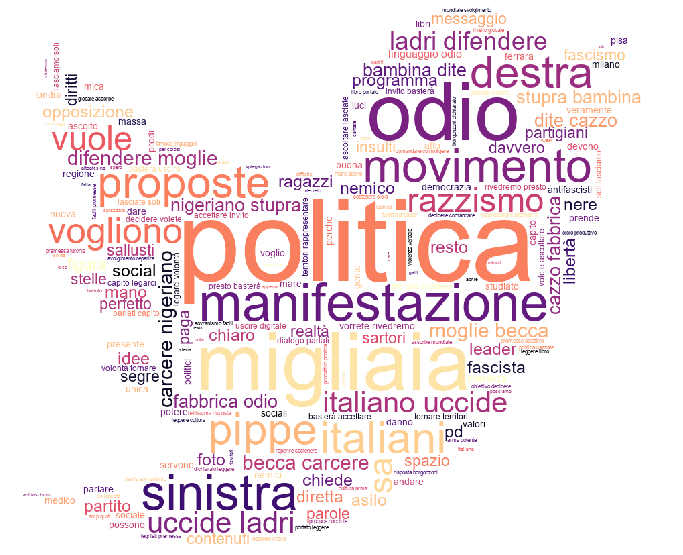

In [116]:
plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(r"D:\Data_Science_all\MSC_2_anno\Progetto_SOCIAL_MEDIA_ANALYTICS/twitter_bot.png")